In [ ]:
import pandas
import configparser
import psycopg2

In [21]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [22]:
conn = psycopg2.connect(host = host,
                       user = user, 
                       password =pwd, 
                       dbname = db)

In [23]:

#Q1
sql = """ select * from student"""

In [24]:
df = pandas.read_sql_query(sql, conn)
df[:]

/tmp/ipykernel_8470/3166211841.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql, conn)


,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,IA


In [29]:
sql = """select professor.p_name, course.c_name
        from professor
        inner join course
        on professor.p_email = course.p_email"""

In [30]:
df = pandas.read_sql_query(sql, conn)
df[:10]

/tmp/ipykernel_8470/647199877.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql, conn)


,p_name,c_name
0,p2,mongodb
1,p3,facebook
2,p3,postgresql
3,p3,twitter


In [31]:
sql = """select p_name, c_name
        from professor, course"""

In [32]:
df = pandas.read_sql_query(sql, conn)
df[:10]

/tmp/ipykernel_8470/647199877.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql, conn)


,p_name,c_name
0,p2,mongodb
1,p2,facebook
2,p2,postgresql
3,p2,twitter
4,p3,mongodb
5,p3,facebook
6,p3,postgresql
7,p3,twitter


In [38]:
sql = """select c_number, count(*) as num_student
        from enroll
        group by c_number
        order by num_student desc"""

/tmp/ipykernel_8470/747274001.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql, conn)


<Axes: xlabel='c_number'>

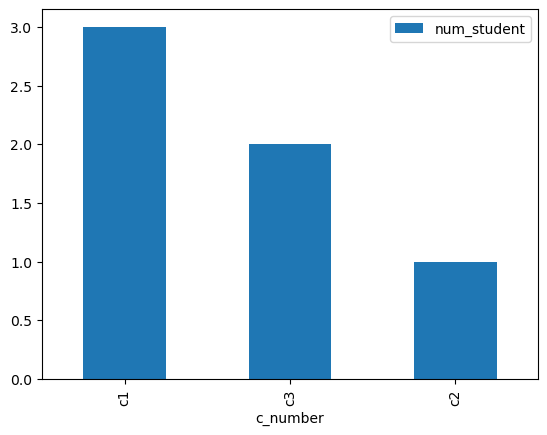

In [39]:
df = pandas.read_sql_query(sql, conn)
df.plot.bar(x='c_number',y='num_student')

In [49]:
sql = """select professor.p_name, count(course.c_number) as num_courses
        from professor
        inner join course on professor.p_email = course.p_email
        group by professor.p_name
        order by num_courses desc"""

/tmp/ipykernel_8470/3923700695.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql, conn)


<Axes: xlabel='p_name'>

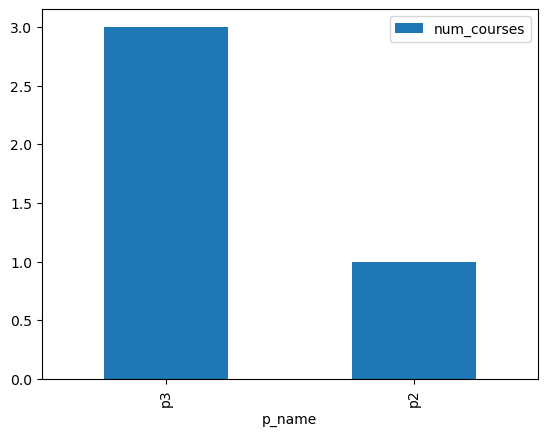

In [50]:
df = pandas.read_sql_query(sql, conn)
df.plot.bar(x='p_name',y='num_courses')

In [101]:

cur = conn.cursor()


In [102]:
sql = """insert into professor(p_email,p_name,office)
        values('p4@jmu.edu','p4','o4')"""

        

In [103]:
cur.execute(sql)


UniqueViolation: duplicate key value violates unique constraint "professor_pkey"
DETAIL:  Key (p_email)=(p4@jmu.edu) already exists.


In [104]:
conn.commit()

In [105]:
df = pandas.read_sql_query('select * from professor', conn)
df[:]


/tmp/ipykernel_8470/4162971110.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select * from professor', conn)


,p_email,p_name,office
0,p2@jmu.edu,p2,o2
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4


In [106]:
sql = """insert into course(c_number,c_name,room,p_email)
        values('c5','linkedin','r2','p4@jmu.edu')"""


In [107]:
cur.execute(sql)


UniqueViolation: duplicate key value violates unique constraint "course_pkey"
DETAIL:  Key (c_number)=(c5) already exists.


In [108]:
conn.commit()

In [109]:
df = pandas.read_sql_query('select * from course', conn)
df[:]


/tmp/ipykernel_8470/4092952724.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select * from course', conn)


,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c4,facebook,r1,p3@jmu.edu
2,c1,postgresql,r1,p3@jmu.edu
3,c3,twitter,r1,p3@jmu.edu
4,c5,linkedin,r2,None


In [110]:
conn.rollback()